In [2]:
import numpy as np
import pylab

def thresholding_algo(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))

In [9]:
# Data

"""
y = np.array([1,1,1.1,1,0.9,1,1,1.1,1,0.9,1,1.1,1,1,0.9,1,1,1.1,1,1,1,1,1.1,0.9,1,1.1,1,1,0.9,
       1,1.1,1,1,1.1,1,0.8,0.9,1,1.2,0.9,1,1,1.1,1.2,1,1.5,1,3,2,5,3,2,1,1,1,0.9,1,1,3,
       2.6,4,3,3.2,2,1,1,0.8,4,4,2,2.5,1,1,1])
"""
def threshoulding(y) :
    
    # Settings: lag = 30, threshold = 5, influence = 0
    lag = 30
    threshold = 5
    influence = 0

    # Run algo with settings from above
    result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)
    return result 
"""
# Plot result
pylab.subplot(211)
pylab.plot(np.arange(1, len(y)+1), y)

pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"], color="cyan", lw=2)

pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"] + threshold * result["stdFilter"], color="green", lw=2)

pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"] - threshold * result["stdFilter"], color="green", lw=2)

pylab.subplot(212)
pylab.step(np.arange(1, len(y)+1), result["signals"], color="red", lw=2)
pylab.ylim(-1.5, 1.5)
pylab.show()
"""

'\n# Plot result\npylab.subplot(211)\npylab.plot(np.arange(1, len(y)+1), y)\n\npylab.plot(np.arange(1, len(y)+1),\n           result["avgFilter"], color="cyan", lw=2)\n\npylab.plot(np.arange(1, len(y)+1),\n           result["avgFilter"] + threshold * result["stdFilter"], color="green", lw=2)\n\npylab.plot(np.arange(1, len(y)+1),\n           result["avgFilter"] - threshold * result["stdFilter"], color="green", lw=2)\n\npylab.subplot(212)\npylab.step(np.arange(1, len(y)+1), result["signals"], color="red", lw=2)\npylab.ylim(-1.5, 1.5)\npylab.show()\n'

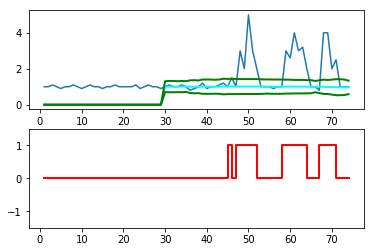

In [11]:
# Data

y = np.array([1,1,1.1,1,0.9,1,1,1.1,1,0.9,1,1.1,1,1,0.9,1,1,1.1,1,1,1,1,1.1,0.9,1,1.1,1,1,0.9,
       1,1.1,1,1,1.1,1,0.8,0.9,1,1.2,0.9,1,1,1.1,1.2,1,1.5,1,3,2,5,3,2,1,1,1,0.9,1,1,3,
       2.6,4,3,3.2,2,1,1,0.8,4,4,2,2.5,1,1,1])


# Settings: lag = 30, threshold = 5, influence = 0
lag = 30
threshold = 5
influence = 0

# Run algo with settings from above
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)
#return result 
# Plot result
pylab.subplot(211)
pylab.plot(np.arange(1, len(y)+1), y)

pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"], color="cyan", lw=2)

pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"] + threshold * result["stdFilter"], color="green", lw=2)

pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"] - threshold * result["stdFilter"], color="green", lw=2)

pylab.subplot(212)
pylab.step(np.arange(1, len(y)+1), result["signals"], color="red", lw=2)
pylab.ylim(-1.5, 1.5)
pylab.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import openpyxl
import statistics
import math
from matplotlib.backends.backend_pdf import PdfPages


def diff_x_i(sig, x_i) :
    return [sig[i]-x_i for i in range(len(sig))]


def diff_a_iw_abs(a_i, a_iw) :
    return abs(a_i - a_iw)


def K_function(x) : 
#    return 1/math.sqrt(2*math.pi) * math.e ** (-(x**2) / 2)

    if (math.fabs(x) < 1) :
        return (3/4) * (1 - (x**2))
    else :
        return 0

def probability_p_w_calculation(a_list, w) :
    M = len(a_list)
    p_w_list = []
    for i in range(len(a_list)-w):
        diff_a_iw = diff_a_iw_abs(a_list[i], a_list[i+w])
        sum_K = 0
        for j in range(len(a_list)) :
            sum_K += K_function((a_list[i]-a_list[j]) / diff_a_iw)
        p_w_list.append(sum_K/(M*diff_a_iw))
        
    return p_w_list
"""        
    for i in range(len(a_list)-w, len(a_list)) :
        diff_a_iw = diff_a_iw_abs(a_list[i], a_list[i - len(a_list) + w])
        sum_K = 0
        for j in range(len(a_list)) :
            sum_K += K_function((a_list[i]-a_list[j]) / diff_a_iw)
        p_w_list.append(sum_K/(M*diff_a_iw))
"""    
    
        
     
def Entropy_H(p_w_list) :
    return sum([-p_w*math.log(p_w) for p_w in p_w_list])
            

def S_4_calculation(N, k, w) :
    S_4 = []
    for i in range(k, len(N)-k) :
        N_list = N[i+1:i+k+1]
        N_dot_list = N[i+1:i+k+1]
        N_list = np.append(N_list, N[i-k:i])
        N_dot_list = np.append(N_dot_list, N[i])
        N_dot_list = np.append(N_dot_list, N[i-k:i])
        #print(N[i-k : i+k+1])
        #print(N_list)
        #print(N_dot_list)
        #print()
        P_N = probability_p_w_calculation(N_list, w)
        P_N_dot = probability_p_w_calculation(N_dot_list, w)
        #print(P_N)
        #print(P_N_dot)
        H_N = Entropy_H(P_N)
        H_N_dot = Entropy_H(P_N_dot)
        S_4.append(H_N - H_N_dot)
    return S_4

    
    
    
#ファイルの読み込み                                                                                                                         
#file_name1 = sys.argv[1]                                                                                                                   
#file_name2 = sys.argv[2]                                                                                                                   
#file1 = pd.ExcelFile(file_name1+'.xlsx')                                                                                                   
#file2 = pd.ExcelFile(file_name2+'.xlsx')                                                                                                   

def write_data(wb_sheet, sig, column_point, start_row, value_title) :
    wb_sheet.cell(column=column_point, row=1, value=value_title)
    for i, sig_data in enumerate(sig) :
        #print(sig_data)
        wb_sheet.cell(column=column_point, row=i+start_row, value=sig_data)

#file1 = pd.ExcelFile(sys.argv[1])
#file1 = pd.ExcelFile("/home/nodoka/win/ubuntu/01-data/restraint-25000/B39-HR/B39-restraint-R2.xlsx")
file1 = pd.ExcelFile("C14-female-L2.xlsx")
#file1 = openpyxl.load_workbook("C14-female-L3.xlsx")
#file1 = pd.ExcelFile("/st9/b009vb/01data/restraint-25000/B39-HR/B39-restraint-R2.xlsx")
#file2 = pd.ExcelFile(sys.argv[2])

sheet_df1 = file1.parse(file1.sheet_names, header=None)
#sheet_df2 = file2.parse(file2.sheet_names, header=None)

#cmap = plt.get_cmap("tab20")                                                                                                               

sheet_names1 = file1.sheet_names
#sheet_names2 = file2.sheet_names

cannel_start = 10
cannel_end = 5
pdf = PdfPages('test2.pdf')

def inspect(file1):
    #ファイル1のデータカウント                                                                                                              
    pattern_dict1 = {}
    sumpsth = 0
    peak = -0.08
    for i, name in enumerate(sheet_names1):
#        print(wb[name]['volt'])
        sheet_df1[i] = file1.parse(name)
        #print(sheet_df1[i])        
        try :
#            for row in wb[name].columns :
#                sig_ori = []
#                for cell in row : 
                    #print(cell.value)
#                    sig_ori.append(cell.value)
            sig_ori = (sheet_df1[i]["volt"]).values
        except KeyError :
            print("not max data number")
            break
        sig_smooth = [(sig_ori[i]+sig_ori[i+1]+sig_ori[i+2])/3  for i in range(len(sig_ori)-2)]
#        write_data(file1[name], sig_smooth, 2, 3, "smooth")
            
        sig_fire = [ 1 if(sig_smooth[i-3] > sig_smooth[i-2]) & (sig_smooth[i-2] > sig_smooth[i-1]) & (sig_smooth[i-1] > sig_smooth[i]) \
                   & (sig_smooth[i] < sig_smooth[i+1]) & (sig_smooth[i+1] < sig_smooth[i+2]) & (sig_smooth[i+2] < sig_smooth[i+3]) & (sig_ori[i+1] <= peak) \
                    else 0 for i in range(3, len(sig_smooth)-3)]
        
        sig_fire_a = [ 1 if(sig_smooth[i] - sig_smooth[i-1] <= 0) & (sig_smooth[i+1] - sig_smooth[i] >= 0) & (sig_ori[i+1] <= peak) \
                     else 0 for i in range(3, len(sig_smooth) -3)]
        
        k = 5
        h = 1.1
    

        S_1 = [(max(diff_x_i(sig_ori[i-k:i], sig_ori[i])) + max(diff_x_i(sig_ori[i+1:i+k+1], sig_ori[i])))/2 for i in range(k, len(sig_ori)-k)]
        sig_mean = sum(S_1)/len(S_1) # m'
        sig_sd = statistics.pstdev(S_1) # s'
        S_1_fire = [1 if(S_1[i]-sig_mean > h*sig_sd) else 0 for i in range(len(S_1))]


                
        
#        S_1_dt = [(max(diff_x_i(sig_ori[i-k:i], sig_ori[i])) + max(diff_x_i(sig_ori[i+1:i+k+1], sig_ori[i])))/2 for i in range(k, len(sig_ori)-k)]
        S_1_fire_dt = [1 if(S_1[i]-sig_mean > h*sig_sd) & (sig_ori[i+k] < sig_ori[i+k-1]) & (sig_ori[i+k] < sig_ori[i+k+1]) else 0 for i in range(len(S_1))]
        
        h = 0.9
        S_2 = [(sum(diff_x_i(sig_ori[i-k:i], sig_ori[i]))/k + sum(diff_x_i(sig_ori[i+1:i+k+1], sig_ori[i]))/k)/2 for i in range(k, len(sig_ori)-k)]
        S_2_fire = [1 if(S_2[i]-sig_mean > h*sig_sd) else 0 for i in range(len(S_2))]
        

        S_3 = [(sig_ori[i] - (sum(sig_ori[i-k:i])/k) + (sig_ori[i] - (sum(sig_ori[i+1:i+k+1])/k)))/2 for i in range(k, len(sig_ori)-k)]
        S_3_fire = [1 if(S_3[i]-sig_mean > h*sig_sd) else 0 for i in range(len(S_3))]
        
        
                
        
        #w = 5
        #k = 5
        #h = 1
        #S_4 = S_4_calculation(sig_ori, k, w)
        #S_4_fire = [1 if(S_4[i]-sig_mean > h*sig_sd) else 0 for i in range(len(S_4))]
        #print(S_4)
        
        
        plot_len = min([len(sig_fire), len(sig_fire_a), len(S_1_fire), len(S_2_fire)])
        
        
        peak_line = [peak for i in range(len(sig_fire))]
        
        #print(sig_fire)
        
        #print(sig_ori)
        plt.figure(figsize=(10, 4))
        plt.subplot(3, 1, 1)
        plt.subplots_adjust(wspace=0.0, hspace=0)
        #plt.figure()
        start_point = int((len(sig_ori)-plot_len)/2)
        if(start_point == 0) :
            plt.plot(sig_ori)
        else :
            plt.plot(sig_ori[start_point:-start_point])
        plt.plot(peak_line)
        
        #plt.figure(figsize=(10, 4))
        plt.subplot(3, 1, 2)
        plt.subplots_adjust(wspace=0.0, hspace=0)
        #plt.figure()
        start_point = int((len(sig_smooth)-plot_len)/2)
        if(start_point == 0) :
            plt.plot(sig_smooth)
        else :
            plt.plot(sig_smooth[start_point:-start_point])
        #plt.plot(sig_smooth[3:-3])
        
        
        
        plt.subplot(21, 1, 15)
        plt.ylim(0.95, 1.05)
        plt.yticks(color="None")
        plt.xticks(color="None")
        #plt.scatter([i/25 for i in range(len(sig1))],sig1,marker='s', s=10)
        start_point = int((len(sig_fire)-plot_len)/2)
        if(start_point == 0) :
            plt.scatter([i/25 for i in range(len(sig_fire))], sig_fire,marker='s', s=3)
        else :
            plt.scatter([i/25 for i in range(len(sig_fire[start_point:-start_point]))], sig_fire[start_point:-start_point],marker='s', s=3)
 
        plt.subplot(21, 1, 16)
        plt.ylim(0.95, 1.05)
        plt.xticks(color="None")
        plt.yticks(color="None")
        #plt.scatter([i/25 for i in range(len(sig1))],sig1,marker='s', s=10)
        start_point = int((len(sig_fire_a)-plot_len)/2)
        if(start_point == 0) :
            plt.scatter([i/25 for i in range(len(sig_fire_a))], sig_fire_a,marker='s', s=3)
        else :
            plt.scatter([i/25 for i in range(len(sig_fire_a[start_point:-start_point]))], sig_fire_a[start_point:-start_point],marker='s', s=3)
        
        """
        plt.subplot(9, 1, 9)
        plt.ylim(0.95, 1.05)
        plt.yticks(color="None")
        #plt.scatter([i/25 for i in range(len(sig1))],sig1,marker='s', s=10)
        start_point = int((len(sig_fire_a)-plot_len)/2)
        if(start_point) :
            plt.scatter([i/25 for i in range(len(sig_fire_a))], sig_fire_a,marker='s', s=10)
        else :
            plt.scatter([i/25 for i in range(len(sig_fire_a[start_point:-start_point]))], sig_fire_a[start_point:-start_point],marker='s', s=10)
        
        """
        plt.subplot(21, 1, 17)
        plt.ylim(0.95, 1.05)
        plt.yticks(color="None")
        plt.xticks(color="None")
        #plt.scatter([i/25 for i in range(len(sig1))],sig1,marker='s', s=10)
        start_point = int((len(S_1_fire)-plot_len)/2)
        if(start_point == 0) :
            plt.scatter([i/25 for i in range(len(S_1_fire))], S_1_fire,marker='s', s=3)
        else :
            plt.scatter([i/25 for i in range(len(S_1_fire[start_point:-start_point]))], S_1_fire[start_point:-start_point],marker='s', s=3)
        
        
        plt.subplot(21, 1, 18)
        plt.ylim(0.95, 1.05)
        plt.yticks(color="None")
        plt.xticks(color="None")
        #plt.scatter([i/25 for i in range(len(sig1))],sig1,marker='s', s=10)
        start_point = int((len(S_1_fire_dt)-plot_len)/2)
        if(start_point == 0) :
            plt.scatter([i/25 for i in range(len(S_1_fire_dt))], S_1_fire_dt,marker='s', s=3)
        else :
            plt.scatter([i/25 for i in range(len(S_1_fire_dt[start_point:-start_point]))], S_1_fire_dt[start_point:-start_point],marker='s', s=3)
        
        
        
        plt.subplot(21, 1, 19)
        plt.ylim(0.95, 1.05)
        plt.yticks(color="None")
        plt.xticks(color="None")        
        start_point = int((len(S_2_fire)-plot_len)/2)
        if(start_point == 0) :
            plt.scatter([i/25 for i in range(len(S_2_fire))], S_2_fire,marker='s', s=3)
        else :
            plt.scatter([i/25 for i in range(len(S_2_fire[start_point:-start_point]))], S_2_fire[start_point:-start_point],marker='s', s=3)


        plt.subplot(21, 1, 20)
        plt.ylim(0.95, 1.05)
        plt.yticks(color="None")
#        plt.xticks(color="None")        
        start_point = int((len(S_3_fire)-plot_len)/2)
        if(start_point == 0) :
            plt.scatter([i/25 for i in range(len(S_3_fire))], S_3_fire,marker='s', s=3)
        else :
            plt.scatter([i/25 for i in range(len(S_3_fire[start_point:-start_point]))], S_3_fire[start_point:-start_point],marker='s', s=3)
            
                   
            
        #plt.scatter([i/25 for i in range(len(S_1_fire))], S_1_fire,marker='s', s=10)
        #print(S_1_fire)
        
        pdf.savefig()
        plt.close()
#    wb.save("smooth_data.xlsx")
    pdf.close()
    
#    print()                                        

#file1 = pd.ExcelFile(sys.argv[1])


#parameter1_start = int(sys.argv[3])
#parameter1_end = int(sys.argv[4])
parameter1_start = 1
parameter1_end = 1

#parameter2_start = int(sys.argv[5])
#parameter2_end = int(sys.argv[6])
parameter2_start = 1
parameter2_end = 1

#step = int(sys.argv[7])


#file_kull = open("divergence.txt", "a")
#file_data = open("data-ab.txt", "a")
count_data = open("count_data.csv", "a")
inspect(file1)

In [70]:
def diff_x_i(sig, x_i) :
    print(x_i)
    print(sig)
    print()
    return [sig[i]-x_i for i in range(len(sig))]

k = 5
#d = np.array([1,1,2,3,1])
#x_i = np.array([1 for i in range(len(d))])
#d = x_i - d
sig_ori = [1,1,3,5,6,7,78,8,5,4,34,3,3.3,3,34]
#print()
d = [(min(diff_x_i(sig_ori[i-k:i], sig_ori[i])) + min(diff_x_i(sig_ori[i+1:i+k+1], sig_ori[i])))/2 for i in range(k, len(sig_ori)-k)]
#d = [(min(diff_x_i(sig_ori[i-k:i-1], sig_ori[i]))+ min(diff_x_i(sig_ori[i+k:i+1], x_i)))/2 for i in range(k, len(sig_ori)-k)]
print(d[0:0])

if(int(0)) :
    print("dd")

7
[1, 1, 3, 5, 6]

7
[78, 8, 5, 4, 34]

78
[1, 3, 5, 6, 7]

78
[8, 5, 4, 34, 3]

8
[3, 5, 6, 7, 78]

8
[5, 4, 34, 3, 3.3]

5
[5, 6, 7, 78, 8]

5
[4, 34, 3, 3.3, 3]

4
[6, 7, 78, 8, 5]

4
[34, 3, 3.3, 3, 34]

[]
